# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [34]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [35]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [36]:
# Get the number of rows and columns
num_rows, num_columns = df.shape

# Print the results
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 1898
Number of columns: 9


#### Observations:

The data set has 1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [37]:
# Use info() to print a concise summary of the DataFrame
# Print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

The dataset contains 4 different datatypes int64, object, float64.

*   4 elements have object datatype: restaurant_name, cuisine_type, day_of_the_week, and rating.
*   4 elements have int64 data type: order_id, customer_id, food_preparation_time, and delivery_time.
*   1 element has float64 datatype: cost_of_the_order.










### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [38]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
missing_values

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

There are not missing values in the data. However, column rating has several values as "Not Given".


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [39]:
# Calculate the minimum, average, and maximum food preparation times
min_preparation_time = df['food_preparation_time'].min()
avg_preparation_time = df['food_preparation_time'].mean()
max_preparation_time = df['food_preparation_time'].max()

# Print the results
print(f"Minimum food preparation time: {min_preparation_time} minutes")
print(f"Average food preparation time: {avg_preparation_time:.2f} minutes")
print(f"Maximum food preparation time: {max_preparation_time} minutes")

Minimum food preparation time: 20 minutes
Average food preparation time: 27.37 minutes
Maximum food preparation time: 35 minutes


#### Observations:
*   The Minimum food preparation time: **20 minutes.**
*   Average food preparation time: **27.37 minutes.**
*   Maximum food preparation time: **35 minutes.**






### **Question 5:** How many orders are not rated? [1 mark]

In [40]:
# Count the number of orders that are not rated (where 'rating' is "Not given")
unrated_orders_count = (df['rating'] == "Not given").sum()

# Print the result
print(f"Number of orders not rated: {unrated_orders_count}")

Number of orders not rated: 736


In [41]:
# Calculate the total number of ratings (excluding missing values)
total_ratings = df['rating'].count()

# Calculate the percentage of total rating data that is not rated
percentage_not_rated = (unrated_orders_count / total_ratings) * 100

# Print the result
print(f"Percentage of total rating data not rated: {percentage_not_rated:.2f}%")

Percentage of total rating data not rated: 38.78%


#### Observations:

*   The Number of orders not rated is 736.
*   38.78% of the "Rating" data is not rated ("Not Given").





### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

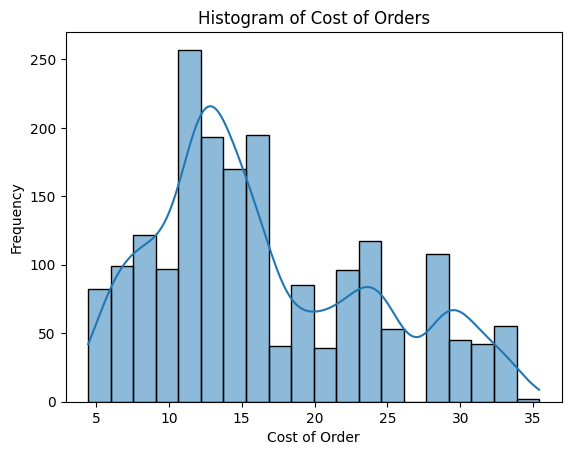

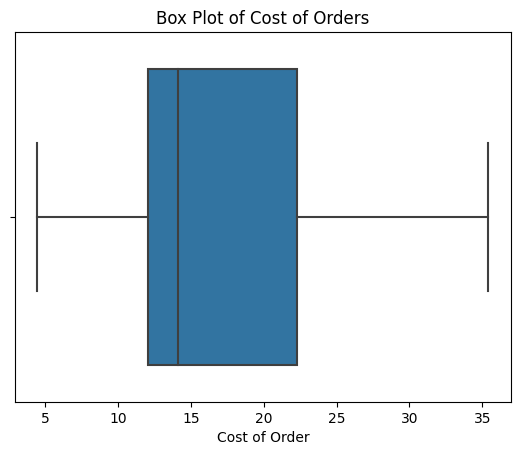

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Histogram of cost_of_the_order
sns.histplot(df['cost_of_the_order'], bins=20, kde=True)
plt.title('Histogram of Cost of Orders')
plt.xlabel('Cost of Order')
plt.ylabel('Frequency')
plt.show()

# Box plot of cost_of_the_order
sns.boxplot(data=df,x='cost_of_the_order')
plt.title('Box Plot of Cost of Orders')
plt.xlabel('Cost of Order')
plt.show()




#### Observations:

*   The central tendecy of the data is between 11 and 22. Quartile1:11, Quartile 3: 22.
*   The cost of order is skewed to the Right.
*   The majority of the orders are less than 25.
*   The mode of cost of order is 11.
*   The max prices registered is 35 and the min price registered is 5.






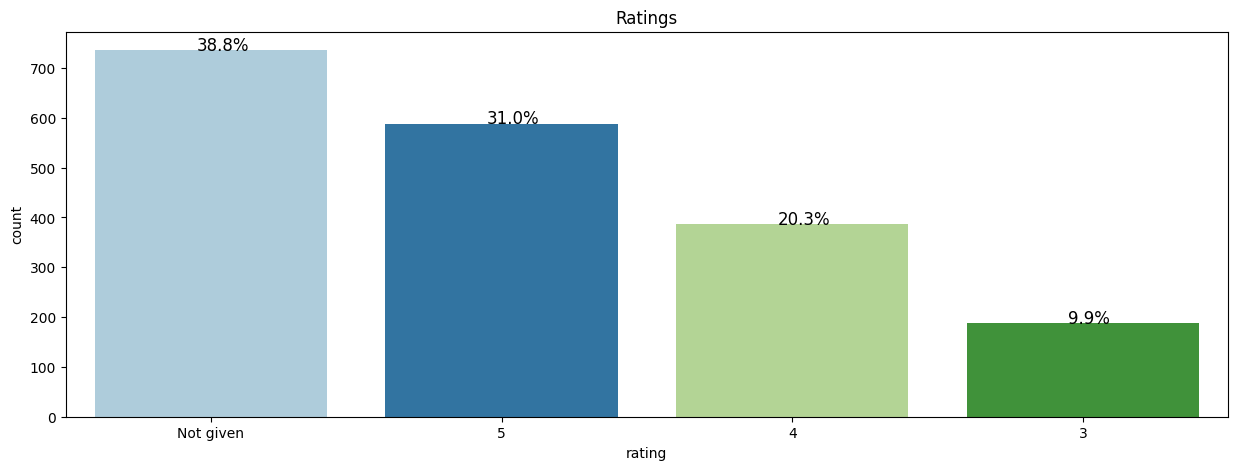

In [43]:
# Variable 2: rating
def bar_perc(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (15, 5))

    # Convert the column to a categorical data type
    data[z] = data[z].astype('category')

    ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage

    plt.title('Ratings')                                            # Plot title
    plt.show()                                                      # Display the plot

bar_perc(df, 'rating')

#### Observations:

*   5 rating represents 31% of the data.
*   4 rating represents 20.3% of the data.
*   3 rating represents 9.9% of the data.
*   The majority of the people do not leave any rating. The company could create an incentive to increase the number of ratings to know the performance of each delivery.






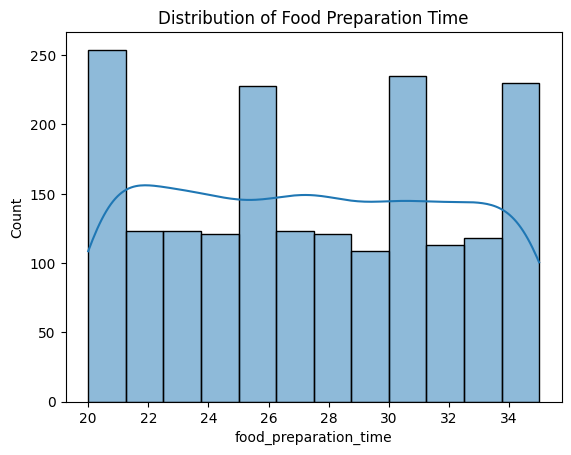

In [44]:
# Variable 3: food_preparation_time
sns.histplot(df['food_preparation_time'], kde=True)
plt.title('Distribution of Food Preparation Time')
plt.show()

#### Observations:

*   Food preparation time moves between 20 min and 35 min.
*   Kde performs around 150.







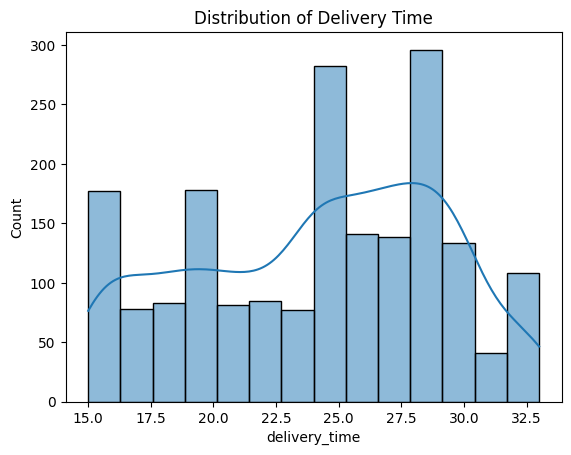

In [45]:
# Variable 4: delivery_time
sns.histplot(df['delivery_time'], kde=True)
plt.title('Distribution of Delivery Time')
plt.show()

#### Observations:

*   Most of the delivery take between 24 min and 30 min.
*   Delivery time mode is left skewed.







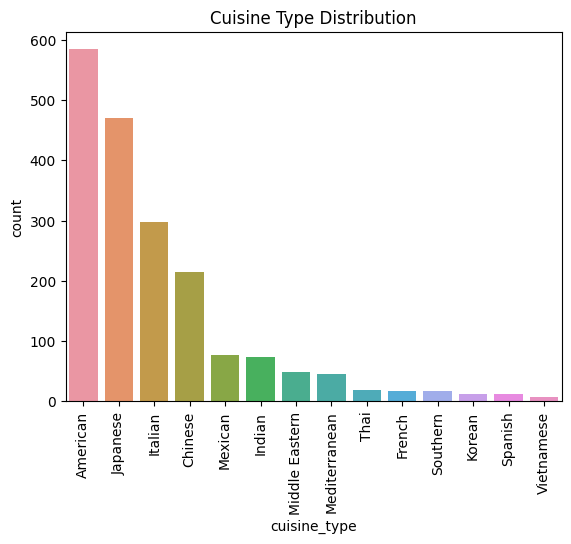

In [46]:
# Variable 5: Cuisine Type Distribution
sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index)
plt.title('Cuisine Type Distribution')
plt.tick_params(axis='x', rotation=90)
plt.show()

#### Observations:

*   Most popular cuisine food are: American, Japanese, Italian, Chinese, and Mexican.







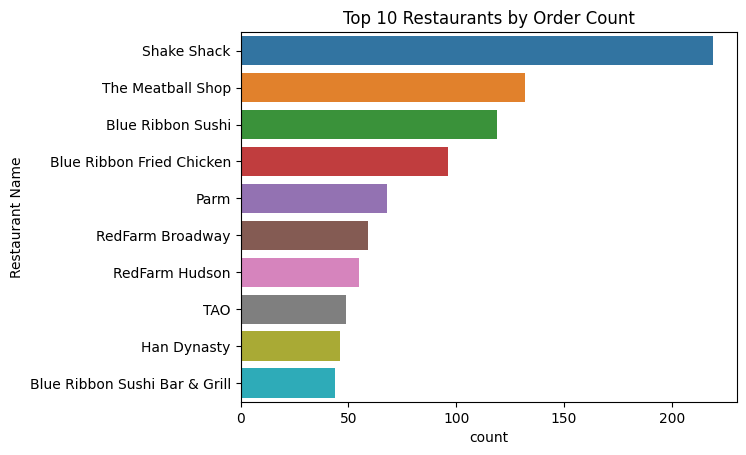

In [47]:
# Variable 6: Top Restaurants
sns.countplot(data=df, y='restaurant_name', order=df['restaurant_name'].value_counts().index[:10])
plt.title('Top 10 Restaurants by Order Count')
plt.ylabel('Restaurant Name')
plt.show()

#### Observations:

*   Most popular Restaurants are: Shake Shack, The Meatball Shop, Blue Ribbon sushi, Blue Ribbon Fried Chicken, and Parm.







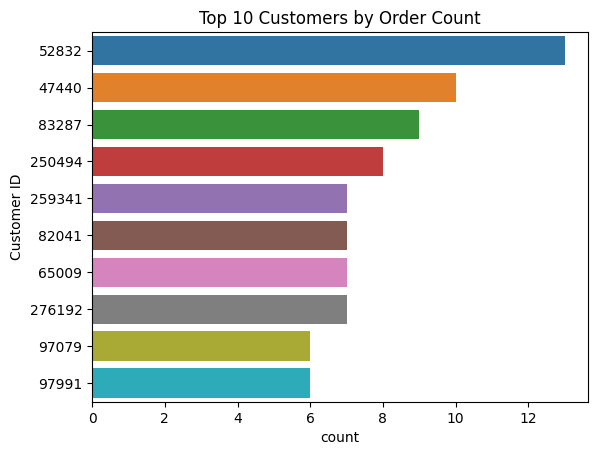

In [48]:
# Variable 7: customer_id (considering as a categorical variable for countplot)
sns.countplot(data=df, y='customer_id', order=df['customer_id'].value_counts().index[:10])
plt.title('Top 10 Customers by Order Count')
plt.ylabel('Customer ID')
plt.show()

#### Observations:

*   Top custumers ID are: 52832, 47440, 83287, 250494, 259341, and 82041.







### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [49]:
# Count the number of orders for each restaurant
restaurant_order_counts = df['restaurant_name'].value_counts()

# Get the top 5 restaurants with the most orders
top_5_restaurants = restaurant_order_counts.head(5)

# Calculate the total number of orders
total_orders = len(df)

# Calculate the percentage of total orders for each of the top 5 restaurants
percentage_of_total_orders = (top_5_restaurants / total_orders) * 100

# Combine the top 5 restaurants and their percentages
top_5_with_percentage = pd.DataFrame({
    'Restaurant': top_5_restaurants.index,
    'Number of Orders': top_5_restaurants.values,
    'Percentage of Total Orders': percentage_of_total_orders.values
})

# Print the result
print("Top 5 restaurants in terms of number of orders received with percentage of total orders:")
print(top_5_with_percentage)

Top 5 restaurants in terms of number of orders received with percentage of total orders:
                  Restaurant  Number of Orders  Percentage of Total Orders
0                Shake Shack               219                   11.538462
1          The Meatball Shop               132                    6.954689
2          Blue Ribbon Sushi               119                    6.269758
3  Blue Ribbon Fried Chicken                96                    5.057956
4                       Parm                68                    3.582719


#### Observations:
* Top 5 restaurants in terms of the number of orders received are: **Shake Shack with 11.538462 %**, **The Meatball Shop with 6.954689%**,  **Blue Ribbon Sushi with 6.269758%**, **Blue Ribbon Fried Chicken with 5.057956%**, **Parm with 3.58%**.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [50]:
# Filter the data for weekend orders (where day_of_the_week is "Weekend")
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

if not weekend_orders.empty:
    # Find the most popular cuisine among weekend orders
    most_popular_cuisine_weekend = weekend_orders['cuisine_type'].mode().iloc[0]

    # Count the number of weekend orders for the most popular cuisine
    weekend_orders_count = (weekend_orders['cuisine_type'] == most_popular_cuisine_weekend).sum()

    # Calculate the percentage of total orders represented by the most popular cuisine on weekends
    total_orders = len(df)
    percentage_of_total_orders = (weekend_orders_count / total_orders) * 100

    print(f"The most popular cuisine on weekends is: {most_popular_cuisine_weekend}")
    print(f"It represents {percentage_of_total_orders:.2f}% of total orders.")
else:
    print("There are no weekend orders in the dataset.")

The most popular cuisine on weekends is: American
It represents 21.87% of total orders.


#### Observations:
The most popular cuisine on weekends is: American
It represents 21.87% of total orders.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [51]:
# Filter the data for orders with a cost greater than 20 dollars
expensive_orders = df[df['cost_of_the_order'] > 20]

# Calculate the percentage of orders that cost more than 20 dollars
total_orders = len(df)
percentage_expensive_orders = (len(expensive_orders) / total_orders) * 100

print(f"{percentage_expensive_orders:.2f}% of the orders cost more than 20 dollars.")

29.24% of the orders cost more than 20 dollars.


#### Observations:

*   29.24% of the orders cost more than 20 dollars.
*   70.76% of orders cost less than 20 dollars.





### **Question 10**: What is the mean order delivery time? [1 mark]

In [52]:
# Calculate the mean order delivery time
mean_delivery_time = df['delivery_time'].mean()

print(f"The mean order delivery time is: {mean_delivery_time:.2f} minutes.")

The mean order delivery time is: 24.16 minutes.


#### Observations:
The mean order delivery time is: 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [53]:
# Count the number of orders for each customer
customer_order_counts = df['customer_id'].value_counts()

# Get the top 3 most frequent customers
top_3_customers = customer_order_counts.head(3)

# Print the IDs of the top 3 customers and the number of orders they placed
print("Top 3 most frequent customers and their order counts:")
print(top_3_customers)

Top 3 most frequent customers and their order counts:
52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


#### Observations:
Top 3 most frequent customers and their order counts:
52832, 47440, 83287.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


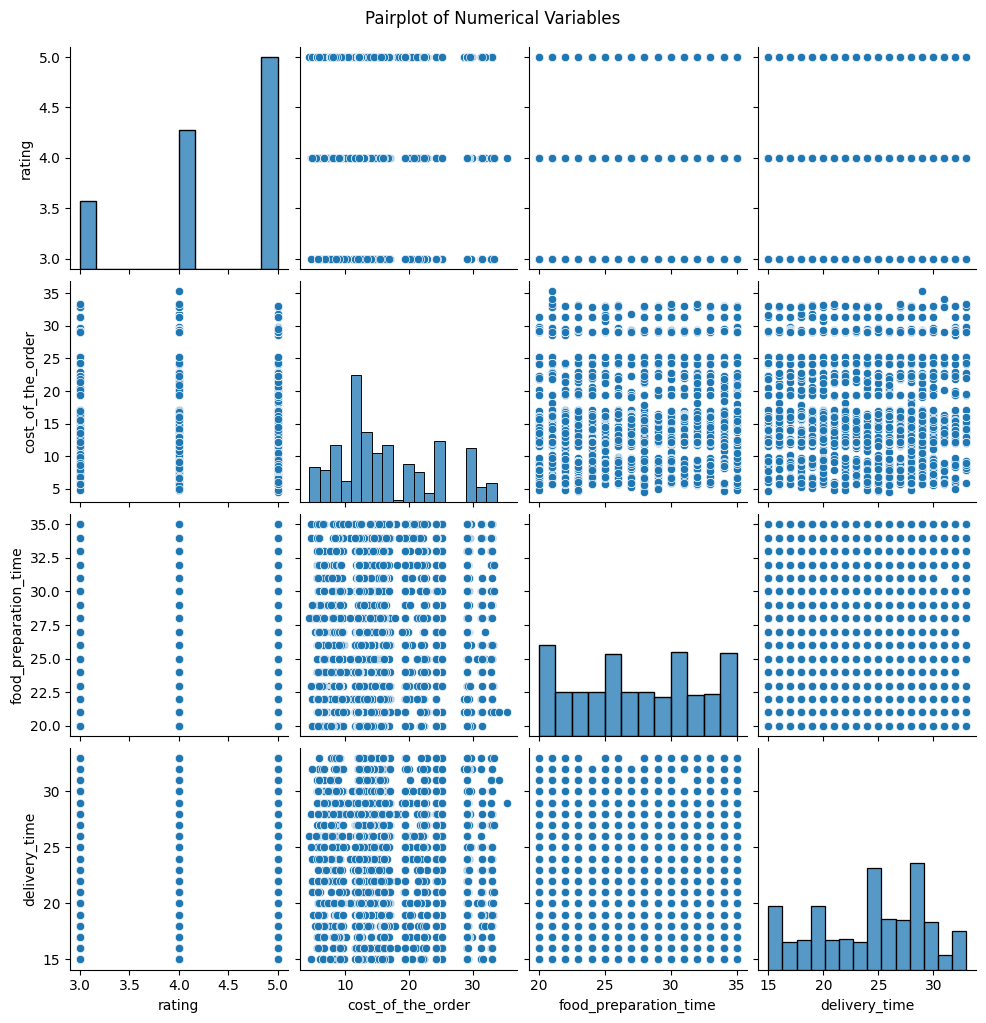

In [54]:
# Replace 'Not given' in the 'rating' column with NaN
df['rating'].replace('Not given', np.nan, inplace=True)
# Convert the 'rating' column to a numerical data type (float)
df['rating'] = df['rating'].astype(float)

# Pairplot for numerical variables
numerical_vars = ['rating','cost_of_the_order', 'food_preparation_time', 'delivery_time',]
sns.pairplot(df[numerical_vars])
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.show()

#### Observations:
There is no correlation between the numerical values.

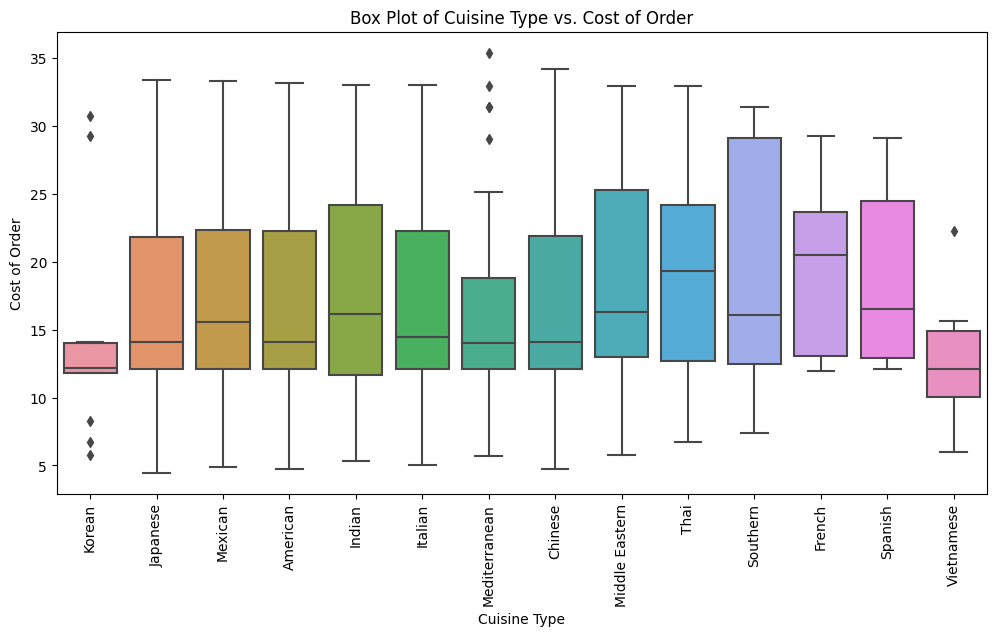

In [55]:
# Box plot for cuisine_type vs. cost_of_the_order
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=90)
plt.title("Box Plot of Cuisine Type vs. Cost of Order")
plt.xlabel("Cuisine Type")
plt.ylabel("Cost of Order")
plt.show()

#### Observations:
*   50% of Vietnamese food orders prices is below the median of all other fo
od types.
*   French food has the highest median food prices.
*   Mediterranean food has the higher outlier with $35.

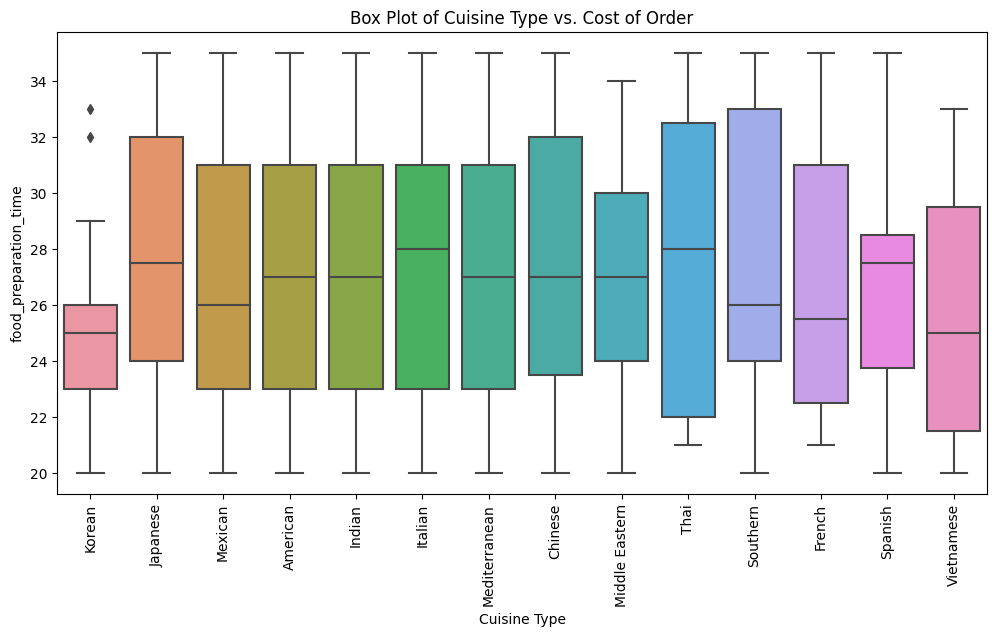

In [56]:
# Box plot for cuisine_type vs. cost_of_the_order
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation=90)
plt.title("Box Plot of Cuisine Type vs. Cost of Order")
plt.xlabel("Cuisine Type")
plt.ylabel("food_preparation_time")
plt.show()

#### Observations:
*   70% of Korean food preparation time is below the median of all other food types.
*   Thai food has the highest median food preparation time.
*   In general preparation time does not change significantly among different food types.

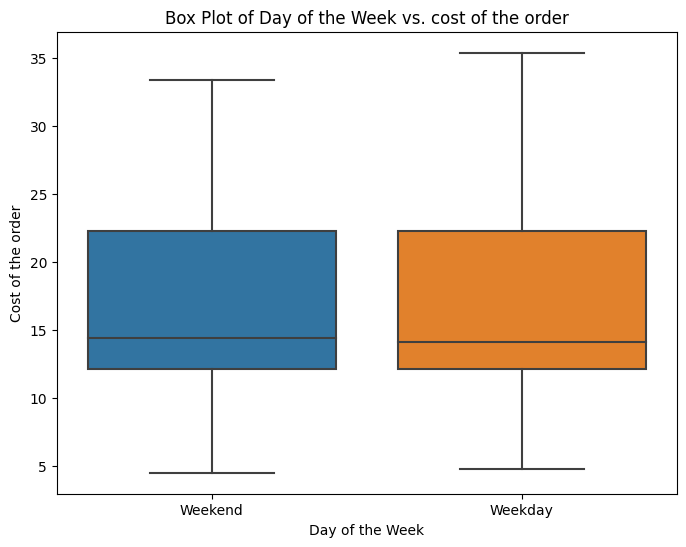

In [57]:
# Box plot for day_of_the_week vs. delivery_time
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order')
plt.title("Box Plot of Day of the Week vs. cost of the order")
plt.xlabel("Day of the Week")
plt.ylabel("Cost of the order")
plt.show()

#### Observations:
Contrary to expectations, day of the week does not affect cost of the order; therefore, people do not spend more money on weekends.

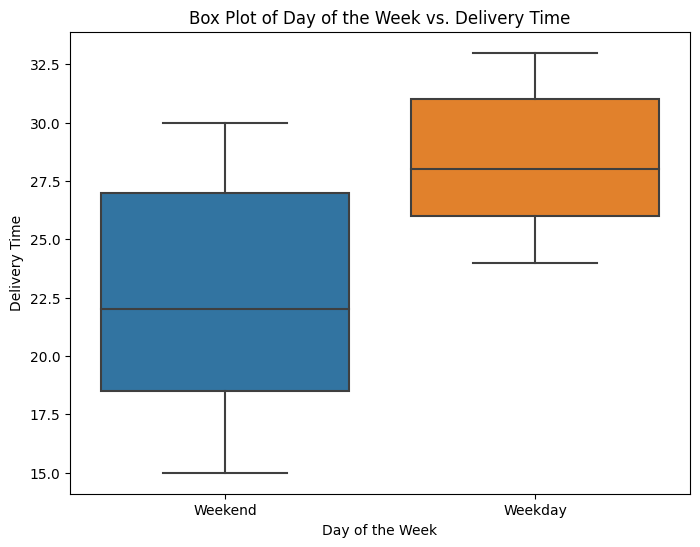

In [58]:
# Box plot for day_of_the_week vs. delivery_time
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.title("Box Plot of Day of the Week vs. Delivery Time")
plt.xlabel("Day of the Week")
plt.ylabel("Delivery Time")
plt.show()

#### Observations:
*   Delivery time takes longer on weekdays than weekends.

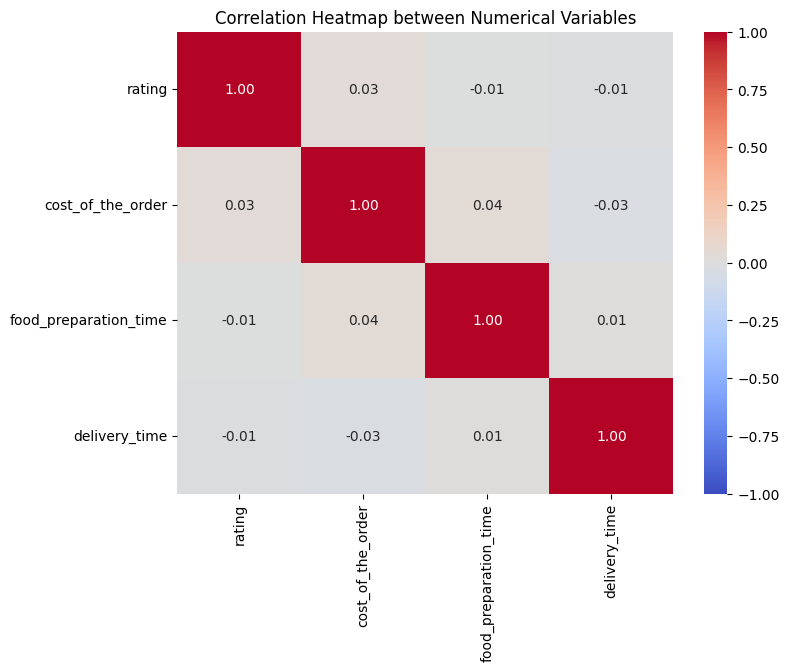

In [59]:
# Heatmap for correlation between numerical variables
correlation_matrix = df[numerical_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1)
plt.title("Correlation Heatmap between Numerical Variables")
plt.show()

#### Observations:
Contrary to expectations, there is no discernible correlation between the numerical values.

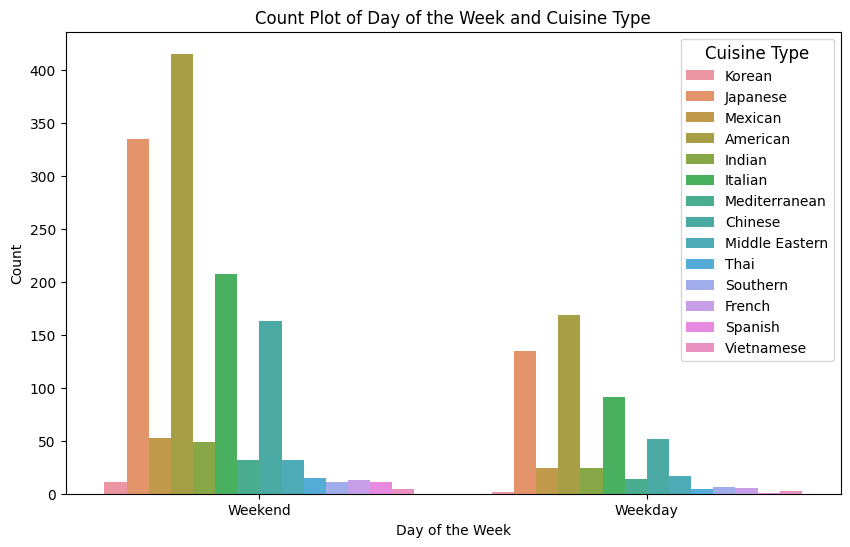

In [60]:
# Count plot for day_of_the_week and cuisine_type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_the_week', hue='cuisine_type')
plt.title("Count Plot of Day of the Week and Cuisine Type")
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.legend(title='Cuisine Type', title_fontsize='12')
plt.show()


#### Observations:
On both weekdays and weekends American cuisine remains a favorite choice, with Japanese food coming in as the second most popular choice, followed by Italian cuisine in third place.   


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [61]:
# Replace 'Not given' in the 'rating' column with NaN
df['rating'].replace('Not given', np.nan, inplace=True)

# Convert the 'rating' column to a numerical data type (float)
df['rating'] = df['rating'].astype(float)

# Group the data by restaurant_name and calculate rating statistics
restaurant_ratings = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Filter restaurants that meet the criteria
promotional_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]

# Print the restaurants fulfilling the criteria
print("Restaurants eligible for the promotional offer:")
print(promotional_restaurants)

Restaurants eligible for the promotional offer:
                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### Observations:
Selected Restaurant: Blue Ribbon Fried Chicken, Blue Ribbon Sushi,     Shake Shack, The Meatball Shop.             

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [62]:
# Calculate the revenue generated by the company for each order
df['revenue_generated'] = 0  # Initialize a new column for revenue

# Calculate revenue for orders with cost > $20 (25% charge)
df.loc[df['cost_of_the_order'] > 20, 'revenue_generated'] = df['cost_of_the_order'] * 0.25

# Calculate revenue for orders with cost > $5 (15% charge)
df.loc[(df['cost_of_the_order'] > 5) & (df['revenue_generated'] == 0), 'revenue_generated'] = df['cost_of_the_order'] * 0.15

# Calculate the total net revenue generated by the company
total_net_revenue = df['revenue_generated'].sum()

print(f"The total net revenue generated by the company is: ${total_net_revenue:.2f}")

The total net revenue generated by the company is: $6166.30


#### Observations:

The total net revenue generated by the company is: $6166.30, it could be improved if the average order stays above 20 dollars or if the company increases the percentage fee.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [63]:
# Calculate the total time required for each order (food preparation time + delivery time)
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the percentage of orders that take more than 60 minutes
percentage_orders_gt_60_minutes = (len(df[df['total_time'] > 60]) / len(df)) * 100

print(f"{percentage_orders_gt_60_minutes:.2f}% of orders take more than 60 minutes to get delivered.")


10.54% of orders take more than 60 minutes to get delivered.


#### Observations:


*   10.54% of orders take more than 60 minutes to get delivered.
*   89.46% of orders take less than 60 minutes to get delivered. Which is a relatively comprehensive waiting time.




### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [64]:
# Calculate the mean delivery time for weekday orders
weekday_mean_delivery_time = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()

# Calculate the mean delivery time for weekend orders
weekend_mean_delivery_time = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

print(f"Mean delivery time on weekdays: {weekday_mean_delivery_time:.2f} minutes")
print(f"Mean delivery time on weekends: {weekend_mean_delivery_time:.2f} minutes")

Mean delivery time on weekdays: 28.34 minutes
Mean delivery time on weekends: 22.47 minutes


#### Observations:
Mean delivery time on weekdays is 28.34 minutes, higher than  Mean delivery time on weekends which is 22.47 minutes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* The company should focus on the top 4 restaurants that receive the most orders and more ratings (**Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, The Meatball Shop**). These restaurants can be prioritized for promotions and marketing efforts to drive more business.
* The company should pay attention to the most popular cuisine types (**American, Japanese and Italian food**). These cuisines can be highlighted in advertisements and promotions to attract more customers.
* The mean delivery **time during weekends is slightly higher than on weekdays.** The company should optimize its delivery processes during weekends to improve customer satisfaction.
* A significant percentage of orders **cost less than $20 (70.76%)**. The company can introduce special offers or promotions for high-cost orders to incentivize customers to spend more.
* **89.46% of orders take less than 60 minutes** to get delivered. Which is a relatively comprehensive waiting time.
* A notable percentage of **orders are not rated (38.78%)**. The company should encourage customers to provide feedback and ratings for their orders, as this can help improve service quality and customer experience.

### Recommendations:

*  The company can collaborate with the top 4 restaurants that receive the most orders and more ratings  (**Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, The Meatball Shop**) and offer exclusive promotional deals. This can attract more customers and increase order frequency.
*  Based on the analysis of popular cuisine types, the company can create **cuisine-specific promotions** and advertisements to target customers interested in those cuisines.
*  To **reduce mean delivery times during weekdays**, the company should consider increasing the number of delivery personnel or optimizing delivery routes. Faster weekdays deliveries can enhance customer satisfaction.
*   Introduce loyalty programs or discounts for customers who frequently place **high-cost orders above $ 20**.This can incentivize them to order more frequently. The total net revenue generated by the company is 6166.30 dollars, it will improve if the average order stays above 20 dollars.
*  **Encourage customers to provide ratings and feedback** by offering discounts or loyalty points for rated orders. This will help gather more valuable feedback and improve service quality.
*  **Continuously analyze customer data** to identify trends and make data-driven decisions. This can lead to more effective marketing campaigns, better service quality, and increased customer satisfaction.

---